# Text representation

Feature extraction is an imporant step for any machine learning problem . No matter how good a modeling algorithm you use , if you feed in poor features , you will get poor results . In computer science , this is often called "garbage in , garbage out" . In this chapter we'll adress the question : how do we go about doing feature engineering for text data ? In other words , how do we transform a given text into numerical form so that it can be fed into NLP and ML algorithms ? In NLP parlance , this conversion of raw text to a suitable numerical form is caller text representation . 

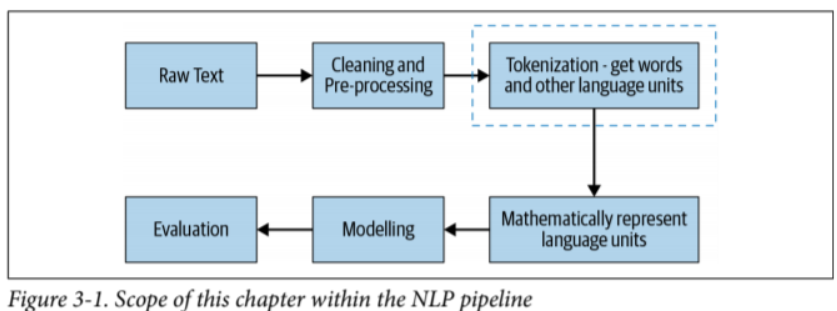

Feature representation is a common step in any ML project , whether the data is text , images , videos , or speech . However , feature representation for text is often much more involved as compared to other formats of data . To understand this , let's look at a few examples of how other data formats can be represented numerically . First , consider the case of images . Say we want to build a classifier that can distinguish images of cats from images of dogs . Now , in order to train an ML model to accomplish this task , we need to feed it (labeled) images . How de we feed images to an ML model ? The way an image is stored in a computer is in the form of a matrix of pixels where each cell[i,j] in the matrix represents pixel i,j of the image.The real value stored at cell[i,j] represents the intensity of the corresponding pixel in the image . This matrix representation accurately represents the complete image . Video is simalar : a video is just a collection of frames where each frame is an image . Hence , any video can be represented as a sequential collection of matrices , one per frame , in the same order . 

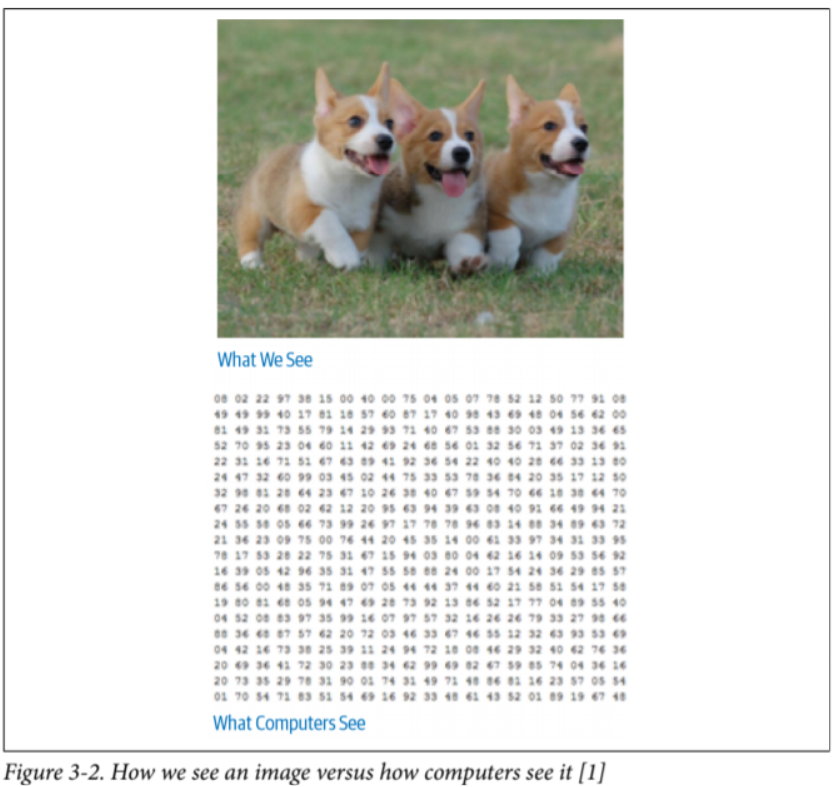

Now consider speech - it's transmitted as a wave . To represent it mathematically , we sample the wave and record it's amplitude (height) . 

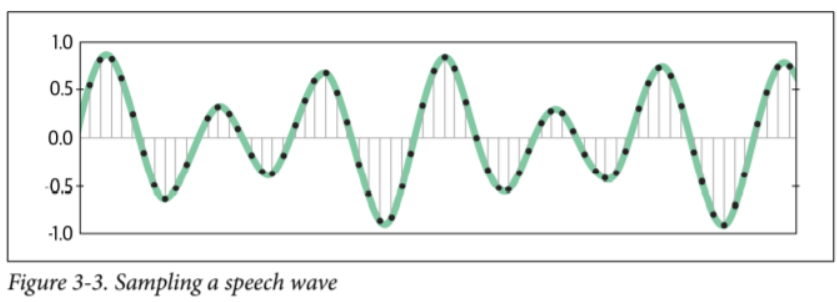

This gives us a numerical array representing the amplitude of a sound wave at fixed time intervals . 

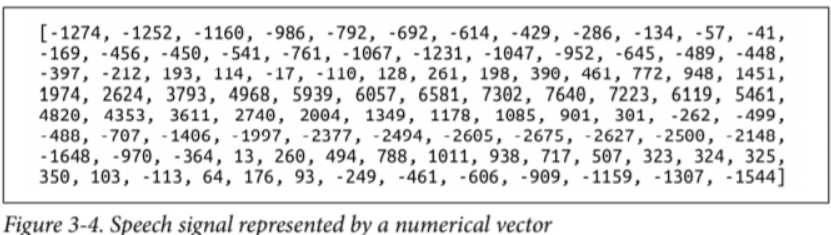

From this discussion , it's clear that mathematically representing images , video , and speech is straightforward . What about text ? It turns out that representing text is not straightforward , hence a whole chapter focusing on various scheme to adress this question . We're given a piece of text , and and we're asked to find a scheme to represent it mathematically . In literature , this is called text representation . Text represenation has been active area of research in the past decades , especially the last one . In this chapter , we'll start with simple approaches are classified into four categories : 

- **Basic vectorization approaches**
- **Distributed representations**
- **Universal language representation**
- **Handcrafted features**

The rest of this chapter describes these categories one by one , covering various algorithms in each . Before we delve deeper into various schemes , consider the following scenario : we're given a labeled text corpus and asked to build a sentiment analysis model . To correctly predict the sentiment of a sentence , the model needs to understand the meaning of the sentence . In order to correctly extract the meaning of the sentence , the most crucial data points are : 

- **1 . Break the sentence into lexical units such as lexemes , words , and phrases .** 
- **2 . Derive the meaning for each of the lexical units .** 
- **3 . Understand the syntactic (grammatical) structure of the sentence .** 
- **4 . Understand the context in which the sentence appears .** 

The semantics (meaning) of the sentence arises from the combination of the above points . Thus , any good text representation scheme must facilitate the extraction of those data points in the best possible way to reflect the linguistic propreties of the text . Without this , a text representation scheme isn't of much use.

Let's take a look at a key concept that caries throughout this entire chapter : the vector space model . 

### The vector space model

It should be clear from the introduction that, in order for ML algorithms to work with text data, the text data must be converted into some mathematical form. Throughout this chapter , we'll represent text units (characters , phonemes , words , phrases , sentences , paragraphs , and documents ) with vectors of numbers . This is known as the vector space model (VSM) . It's a simple algebraic model extensively for representing any text blob . VSM is fundamental to many information-retrieval operations , from scoring documents on a query to document classification and document clustring . It's a mathematical model that represents text units as vectors . In this setting , the most common way to calculate similarity between two text blobs is using cosine similarity : 

To compute the cosine similarity between two vectors, A and B, the following formula is used:

cosine_similarity(A, B) = (A ⋅ B) / (||A|| * ||B||)

where:

- **A ⋅ B represents the dot product of vectors A and B.**
- **||A|| and ||B|| represent the Euclidean norm or length of vectors A and B, respectively.**

The resulting value ranges from -1 to 1. A value of 1 indicates that the two vectors have the same orientation and are perfectly similar, while a value of -1 indicates they have opposite orientations and are dissimilar. A value of 0 means the vectors are orthogonal or completely dissimilar.

All the text representation schemes we'll study in this chapter fall within the scope of vector space models . What differentiates one scheme from another is how well the resulting vector captures the linguistic propreties of the text it represents . With this , we're ready to discuss various text representation schemes . 

## 1 - Basic Vectorization Approaches :

Let's start with a basic idea of text representation : map each word in the vocabulary (V) of the text corpus to a unique ID (integer value) , then represent each sentence or document in the corpus as a V-dimensional vector . How de wo operationalize this idea ? To understand this better , let's take a toy corpus with only four documents - D1 , D2 , D3 , D4 .

- D1 = Dog bites man.
- D2 = Man bites dog.
- D3 = Dog eats meat.
- D4 = Man eats food.

Lowercasing and ignoring punctuation , the vocabulary of this corpus is comprised of six words : [dog , bites , man , eats , meat , food] . We can organize the vocabulary in any order . In this example , we simply take the order in which the words appear in the corpus . Every document in this corpus can now be represented with a vector of size six. We'll assume that the text is already pre-processed (lowercased , punctuation , removed , etc .) and tokenize (text string split into tokens) . We'll start with one-hot encoding.

**1 - One-Hot Encoding** : 

In one-hot encoding , each word w in the corpus vocabulary is given a unique integer ID Wid that is between 1 and abs(V) , where V is the set of corpus vocabulary . Each word is then represented by a V-dimensional binary vector of 0s and 1s . This is done via a abs(V) dimension vector filled with all 0s barring the index , where index = Wid . At this index , we simply put a 1 . The representation for individual words is then combined to form a sentence representation . 

Let's understand this via our toy corpus . We first map each of the six words to unique IDs : dog = 1 , bites = 2 , man = 3 , meat = 4 , food = 5 , eats = 6 .  Let's consider the document D1 : "Dog bites man." . As per the scheme , each word is a six-dimensonal vector . Dog is represented as [1,0,0,0,0,0] , as the word "dog" is mapped to ID 1 . Bites is represented as [0,1,0,0,0,0] , as the word "bites" is mapped to ID 2 , and so on and so forth . Thus , D1 is represented as [[1,0,0,0,0,0],[0,1,0,0,0,0],[0,0,1,0,0,0]] . D4 is represented as [[0,0,1,0,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1]] . Other documents in the corpus can be represented similarly . 

Now that we understand the scheme , let's discuss some of it's pros and cons . One the positive side , one-hot encoding is intuitive to understand and straightforward to implement . However , it suffers from a few shortcomings : 

- The size of a one-hot vector is directly proportional to size of the vocabulary , and most real-world corpora have large vocabularies . This results in a sparse representation where most of the entries in the vectors are zeroes , making it computationally inefficient to store , compute with , and learn from (sparsity leads to overfitting).
- This representation does not give a fixed-length representation for text , i.e., if a text has 10 words , you get a longer representation for it as compared to a text with 5 words . For most learning algorithms , we need the feature vectors to be of the same length . 
- It treats words as atomic units and has no notion os (dis)similarity between words. For example , consider three words run , ran and apple . Run and ran have similar meanings as opposed to run and apple . But if we take their respective vectors and compute Euclidien distance between them , they're all equally apart (√2) . Thus , semantically , they're very poor at capturing the meaning of the word in relation to other words . 
- Say we train a model using our toy corpus . At runtine , we get a sentence "man eats fruits".The training data didn't include "fruit" and there's no way to represent it in our model.one-hot encoding scheme cannot handle this. The only way is to retrain the model:start by expanding the vocabulary , give an ID to the new word , etc. 

Some of these shortcomings can be addressed by the bag-of-words approach described next . 

**2 - Bag of Words** :

Bag of Words (BoW) is a classical text representation technique that has been used commonly in NLP , especially in text classification problems . The key idea behind it is as follows : represent the text under consideration as a bag (collection) of words while ignoring the order and context . The basic intuition behind it is that it assumes that the text belonging to a given class in the dataset is characterized by a unique set of words . if two text pieces have nearly the same words , then they belong to the same bad (class) . Thus , by analyzing the words present in a piece of text , one can identify the class (bag) it belongs to. 

Similar to one-hot encoding , BoW maps words to unique integer IDs between 1 and abs(V) . Each document in the corpus is then converted into a vector of abs(V) where in the ith-componenent of the vector , i = Wid is imply the number of times the word w occurs in the document ,i.e., we simply score each word in V by their occurence count in the document .

Thus , for our toy corpus , where the word IDs are dog = 1 , bites = 2 , man = 3 , meat = 4 , food = 5 , eats = 6 . D1 becomes [1,1,1,0,0,0] . This is because the first three words in the vocabulary appeared exactly once in D1 , and the last three did not appear at all . D4 becomes [0,0,1,0,1,1] .

The BoW representation for the sentence "dog and dog are friends" has a value of 2 for the dimension of the word "dog" , indicating it's frequency in the text. Sometimes , we don't care about the frequency of occurence of words in the text and we only want to represent whether a word exists in the text or not. Researchers have shown that such a representation without considering frequency is useful for sentiment analysis.

Let's look at the advantages of this encoding : 

- Like one-hot encoding , BoW is fairly simple to understand and implement . 
- With representation , documents having the same words will have their vector representations closer to each other in Euclidien space as compared to docuements with completely different words . The distance between D1 and D2 is 0 as compared to the distance between D1 and D4, which is 2.Thus, the vector space resulting from the BoW scheme captures the semantic similarity of documents . So if two documents have similar vocabulary , they'll be closer to each other in the vector space and vice versa . 
- We have a fixed-length encoding for any sentence of arbitrary length . 

Hower , it has it's share of disavdantages, too :

- The size of the vector increases with size of the vocabulary . Thus , sparsity continues to be a problem . One way to control it is by limiting the vocabulary to n number of the most frequent words . 
- It does not capture the similarity between different words that mean the same thing . Say we have three documents : 'I run' , 'I ran' and 'I ate'. BoW vectors of all three will be equally apart.
- This representation does not have any way to hand out of vocabulary words .
- As the name indicates , it is a "bag" of words - word order information is lost in this representation in this scheme . 

However , despite these shortcomings , due to it's simplicity and ease of implementation , BoW is a commonly used text representation scheme , especially for text classification among other NLP problems . 

**3 - Bag of N-Grams** :

All the representation schemes we've seen so far treat words as independent units . There is no notion of phrases or word odering . The bag-of-n-grams (BoN) approach tries to remedy this . It does so by breaking text into chunks of n contiguous words ( or tokens ) . This can help us capture some context , which earlier approaches could not do . Each chunk s called an n-gram . The corpus vocabulary , V , is then nothing but a collection of all unique n-grams across the text corpus . Then , each document in the corpus is represented by a vector of length abs(V) . This vector simply contains the frequency counts of n-grams present in the document and zero for the n-grams that are not present .

To elaborate let's consider our example corpus  . Let's construct a 2-gram (a.k.a bigram) model for it . The set of all bigrams in the corpus is as follows : {dog bites , bites man , man bites , bites dog , dog eats , eats meat ,man eats , eats food} . Then , BoN representation consists of an eight-dimensional vector for each document. The bigram representation for the first two documents is as follows : D1:[1,1,0,0,0,0,0,0] , D2:[0,0,1,1,0,0,0,0] . The other two documents follow similarly . Note that the BoW scheme is a special case of the BoN scheme , with n = 1 . n = 2 is called a "bigram model" and n = 3 is called a "trigram model" . Futher , note that , by increasing the value of n , we can incorporate larger context; however , this further increases the sparsity . In NLP parlance , the BoN scheme is also called "n-gram feature selection".

Here is the main pros and cons of BoN : 

- It captures some context and word-order information in the form of n-grams .
- Thus , resulting vector space is able to capture some semantic similarity . Documents having the same n-grams will have their vectors closer to each other in Euclidean space as compared to documents with completely different n-grams . 
- As n increases , dimensionality (and there sparsity) only increases rapidly.
- It still provides no way to address the OOV problem .

**3 - TF-IDF** :

In all the three approaches we've seen so far , all the words in the text are treated as equally important - there's no notion of some words in the document being more important than others . TF-IDF or term frequency-inverse document frequency , addresses this issue . It aims to quantify the importance of a given word relative to other words in the document and in the corpus . It's commonly used representation scheme for information-retrieval systems , for extracting relevant documents from a corpus for a given text query.

The intuition behind TF-IDF is as follows : if a word w appears many times in a document di but does not occur much in the rest of the documents di in the corpus , then the word w must be of great importance to the document di. The importance should increase in proportion to it's frequency in di , but at the same time , it's importance should decrease in proportion to the word's frequency in other documents dj in the corpus . Mathematically , this is captured using two quantities : TF and IDF . The two are then combined to arrive at the TF-IDF score .

- TF (term frequency) measures how often a term or word occurs in a given document.Since different documents in the corpus may be of different lenghts , a term may occur more often in a longer document as compared to a shorter document. To normalize these counts , we divide the number of occurences by the length of the document . TF of a term t in a document d is defined as : 

TF(t,d) = (Number of occurence of t in the document d) / (Total number of terms in the document d)

- IDF (inverse document frequency) measures the importance of the term across a corpus . In computing TF , all terms are given equal importance (weightage) . However , it's a well-known fact that stop words like is , are , am , etc., are not important , even though they occur frequently . To account for such cases , IDF weights down the terms that are very common accros a corpus and weights up the rare terms . IDF of a term t is calculated as follows : 

IDF(t) = loge (Total number of documents in the corpus) / (Number of documents with term t in tem)

The TF-IDF term score is a product of these two terms . Thus , TF-IDF score = TF * IDF .

If we look back at all the representation schemes we've discussed so far , we notice three fundamental drawbacks : 

- They're discrete representations - i.e., they treat language units (words , n-grams , etc.) as atomic units . This discretness hampers their ability to capture relationships between words .
- The feature vectors are sparse and high-dimensional representations. The dimensionality increases with the size of the vocabulary , with most values being zero for any vector. This hampers learning capability . Further , high-dimensionality representation makes them computationally inefficient.
- They cannot handle OOV words.

with this , we come to the end of basic vectorization approaches . Now , let's start looking at distributed representations .

## 2 - Distributed Representations :

In the previous section , we saw some key drawbacks that are common to all basic vectorization approaches . To overcome these limitations , methods to learn low-dimensional representations were divised . These methods , covered in this section , gained momentum in the past six to seven years . They use neural network architecture to create dense , low-dimensional representations of words and texts . But before we look into these methods , we need to understand some key terms :

- **Distributional similarity** : This is the idea that the meaning of a word can be understood from the context in which the word appears. This is also called known as cannotation : meaning is defined by context . This is opposed to denoation : The literal meaning of any word . For example : "NLP rocks" . The literal meaning of the word "rocks" is "stones" , but from the context , it's used to refer to something good and fashionable .

- **Distributional hypothesis** : In linguistics , this hypothesizes that words that occurs in similar contexts have similar meanings . For example , the English words 'dog' and 'cat' occur in similar contexts . Thus , according to the distributional hypothesis , there must be a strong similarity between the meanings of these two words . Now , following from VSM , the meaning of a word represented by the vector . Thus , if two words often occur in similar context , then their corresponding representation vectors must be close to each other . 

- **Distributional representation** : This refers to representation schemes that are obtained based on distribution of words from the context in which the words appear . These schemes are based on distributional hypotheses . The distributional property is induced from the context (text vicinity) . Mathematically , distributional representation schemes use high-dimensional vectors to represent words . These vectors are obtained from a co-occurence matrix that captures co-occurence of word and context . The dimension of this matrix is equal to the size of the vocabulary of the corpus . The four schemes taht we've seen so fat - one-hot , bad of words , bag of n-grams and TF-IDF - all fall under the umbrella of distributional representation.

- **Distributed representation** : This related concept . It , too , is based on the distributional hypothesis . As discussed in the previous paragraph , the vectors in distributional representation are very high dimensional and sparse . This makes them computationally inefficient and hampers learning . To alleviate this , distributional representation schemes significantly compress the dimensionality . This results in vectors that are compact (i.e., low dimensional) and dense (i.e., hardly any zeros) . The resulting vector space in known as distributed representation . 

- **Embedding** : For the set of words in a corpus , embedding is a mapping between vector space coming from distributional representation to vector space coming from distributed representation . 

- **Vector semantics** : This refers to the set of NLP methods that aim to learn the word representations based on distributional properties of words in a large corpus .

Now that you have a basic understanding of these terms , we can move on to our first method : Word Embeddings .

**1 - Word Embeddings** : 

What does it mean when we say a text representation should capture "distibutional similarities between words" ? Let's consider some examples . If we're given the word "USA" , distibutionally similar words could be other countries (e.g., Canada , Germany , Indea , etc.) or cities in the USA . If we're given the word "beautiful" , words that share some relationship with this word (e.g., synonyms , antonyms ) could be considered distibutionally similar words . These are words that are likely to occur in similar contexts . In 2013 , a seminal work by Mikolov et al.showed that their neural network based word representation model known as "Word2vec" , based on "distibutional similarity" can capture word analogy relationships such as :

King - Man + Woman = Queen

Their model was able to correctly answer many more analogies like this . The Word2vec model is in many ways dawn of modern-day NLP .

While learning such semantically rich relationships , Word2vec ensures that the learned word representations are low dimensional (vectors of dimensions 50-500, instead of several thousands , as with previously studied representations) and dense (That is , most values in these vectors are no-zero).Such representations make ML tasks more tractable and efficient). Word2vec let to a lot of work (both pure and applied) in the direction of learning text representations using neural networks . These representations are also called "embeddings".

- **Pre-trained word embeddings** : Training your own word embeddings is a pretty expensive process (in terms of both and computing) . Thankfully , for many scenarios , it's not necessary to train your own embeddings , and use pre-trained word embeddings often suffices . What are pre-trained word embeddings ? Someone had done the hard work of training word embeddings on a large corpus , such as Wikipedia , new articles , or even the entire web , and has put words and their corresponding vectors on the web . These embeddings can be downloaded and used to get vectors for the words you want . Such embeddings can be thought of as a large-collection of key-value pairs , where keys are the words in the vocabulary and values are their corresponding word vectors . Some of the popular pre-trained embeddings are Word2vec by Google , GloVe by Stanford , and fasttext embeddings by Facebook , to name a few . Further , they're available for various dimensions like d=25,50,100,200,300,600.

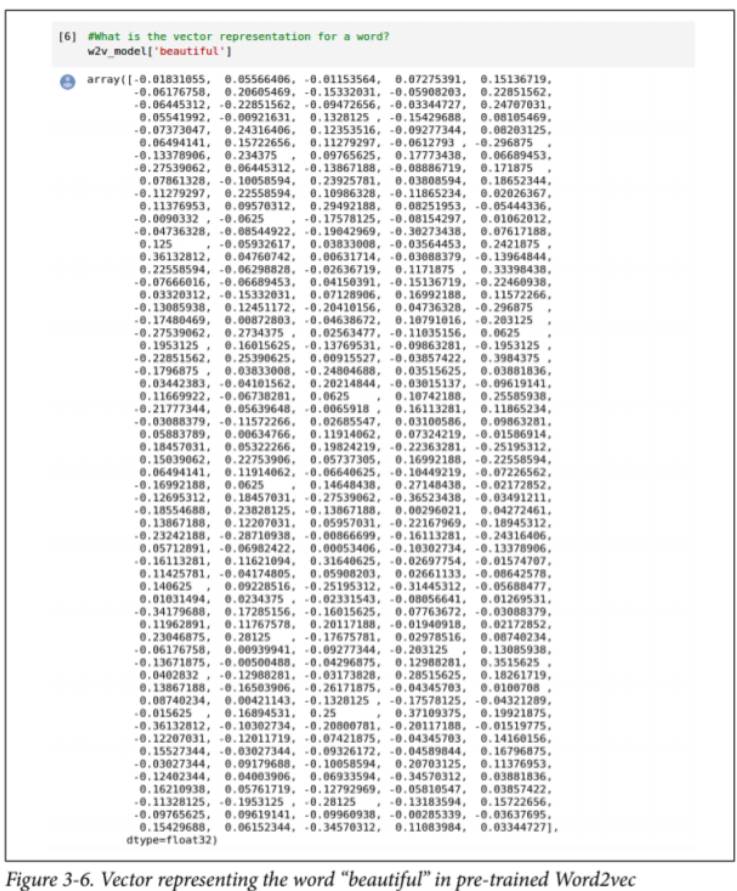

Now let's look at training our own word embeddings.

- **Traing our word embeddings** : Now we'll focus on traing our own word embeddings . For this , we'll look at two architectural variants that were proposed in the original Word2vac approach . The two variants are : 

      1 - Continuous bag of words (CBOW)
      2 - SkipGram
    
- Continuous bag of words (CBOW) tries to learn a language model that tries to predict the "center" word form the words in it's context . 

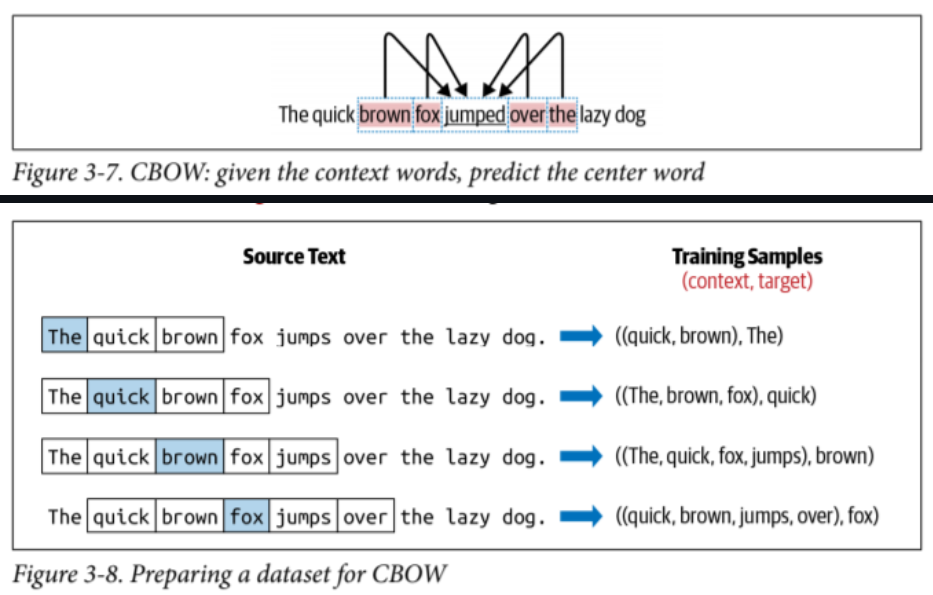

- Continuous bag of words (CBOW) tries to learn a language model that tries to predict the every word in the context from it's "center" word .

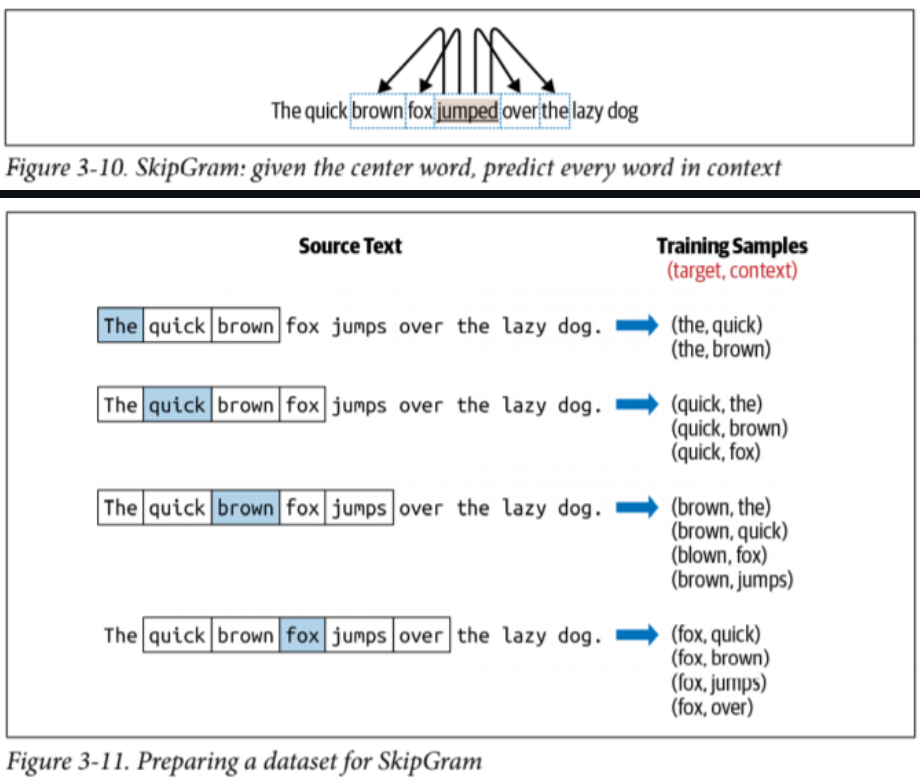

- **Going Beyond Words** : 

So far we've seen examples of how to use pre-trained word embeddings and train our own word embeddings . This gives us a compact and dense representation for words in our vocabulary . However , in most NLP applications , we seldom deal with atomic units like words - we deal with sentences , paragrapghs , or even full texts . So , we need a way to represent larger units of text . Is there a way we can use word embeddings to get feature representations for larger units of text ?

A simple approach is to break the text into consituent words , take the embeddings for individual words , and combine them to form the representation for the text . There are various ways to combine them , the most popular being sum , average , etc., but these may not capture many aspects of the text as a whole , such as ordering . Suprisingly , they work very well in practice . 

**2 - Distributed Representations Beyond Words and Characters** : 

So far , we've seen two approaches to coming up with text representation using embeddings . Word2vec learned representations for words , and we aggregated them to form text representation . fastText learned representations for character n-grams , which were aggregated to form word representations and then text representations . A potential problem with both approaches is that they do not take the context of words into account . Take , for example , the sentences "dog bites man" and "man bites dog" . Both receive the same representation in these approaches , but they obviously have very different meanings . Let's look at another approach , Doc2vec , which allows us to directly learn the representations for texts of arbitrary lenghts (phrases , sentences , paragraphs , and documents) by taking the context of words in the text into account .

Doc2vec is based on the paragraph vectors framework and is implemented in gensim .

**3 - Universal Text Representations** : 

In all the representations we've seen so far , we notice that one word gets one fixed representation . Can this be a problem ? Well , to some extent , yes . Words can mean different things in different contexts . For example , the sentences "I went to a bank to withdraw money" and "I sat by the river bank and pondered about text representations" both use the word "bank" . However,they mean different things in each sentence . With the vectorization and embedding approaches that we've seen so far , there's no direct way to capture this information . 

In 2018 , researchers came up with the idea of contextual word representations , which addresses this issue . It uses "language modeling" , which is the task of predicting the next likely word in a sequence of words . The past few years have seen the advent of advanced neural language models (e.g., transformers) that make use of the word embeddings we discussed earlier but use complex architectures involving multiple passes through the text and multiple reads from left to right and right to left to model the context of language use .

Neural architectures such a recurrent neural networds (RNNs) and transformers were used to develop large-scale models of language(ELMo , BERT) , which can be used as pre-trained models to get text representations . These models have shown significant improvements on some fundamental NLP tasks , such as question answering , semantic role labeling , named entity recognition , and coference resolution , to name a few.

**4 - Visualizing Embeddings** :

So far , we've seen various vectorization techniques for representing text . The vectors obtained are used as features for the NLP task at hand , be it text classification or a question-answering systerm . As important aspect of any ML project is feature exploration . How can we explore the vectors that we have to work with ? Visual exploration is a very important aspect of any data-related problem . Is there a way to visually inspect word vectors ? Even though embeddings are low-dimensional vectors , even 100 or 300 dimensions are too high to visualize . 

Enter t-SNE or t-distributed stochastic Neighboring Embedding . It's a technique used for visualizing high-dimensional data like embeddings by reducing them to two or three-dimensional data. The technique takes in in the embeddings (or any data) and looks at how to best represent the input data using lesser dimensions , all while maintaining the same data distibutions in original high-dimensional input space and low-dimensional output space .This, therefore , enables us to plot and visualize the input data.It helps to get a feel for the space of word embedding .